<a href="https://colab.research.google.com/github/linyuehzzz/privacy_ga/blob/main/DEAP_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
!pip install deap

### **Creating types**

In [ ]:
from deap import base, creator
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


### **Initialization**

In [ ]:
import random
import numpy as np
from deap import tools

HIGH = 2   # binary variables
IND_SIZE = (200, 30)

# create a customer initializer
def init(icls, high, shape):
    return icls(np.random.randint(high, size=shape).tolist())

toolbox = base.Toolbox()
toolbox.register("individual", init, creator.Individual, high=HIGH, shape=IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

Build the first individual

In [112]:
ind1 = toolbox.individual()
print(ind1)
print(ind1.fitness.valid)

[[1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1], [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1], [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1], [0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0], [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1], [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 

### **Operations**

Evaluation

In [122]:
def evaluate(individual):
    # Do some hard computing on the individual
    return sum(list(map(sum, individual))),

# ind1.fitness.values = evaluate(ind1)
# print(ind1.fitness.valid)
# print(ind1.fitness)

Mutation, crossover, and selection

In [123]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, 7.0, distance))

Algorithm

gen	nevals	avg    	min 	max 
0  	50    	2999.24	2927	3115
1  	39    	2963.62	2906	3020
2  	43    	2939.42	2878	3001
3  	41    	2922.78	2871	2981
4  	40    	2908.06	2869	2947
5  	42    	2892.16	2839	2974
6  	40    	2870.22	2832	2908
7  	36    	2854.56	2826	2911
8  	42    	2842.88	2811	2873
9  	36    	2833.6 	2791	2864
10 	43    	2820.56	2773	2868
11 	41    	2805.18	2764	2857
12 	43    	2789.08	2736	2850
13 	37    	2767.94	2700	2813
14 	31    	2747.86	2700	2797
15 	39    	2730   	2684	2770
16 	45    	2709.8 	2661	2755
17 	35    	2692.1 	2661	2737
18 	42    	2677.64	2614	2737
19 	46    	2657.46	2606	2713
20 	43    	2644.3 	2606	2690
21 	39    	2626.4 	2577	2672
22 	41    	2612.8 	2575	2668
23 	38    	2597.78	2567	2632
24 	35    	2586.26	2556	2617
25 	32    	2575.76	2549	2596
26 	44    	2567.04	2526	2602
27 	39    	2551.04	2508	2609
28 	35    	2535.74	2500	2573
29 	39    	2523.56	2486	2556
30 	35    	2512.76	2445	2550
31 	43    	2497.92	2441	2540
32 	38    	2479.22	2441	2517
33 	41    	246

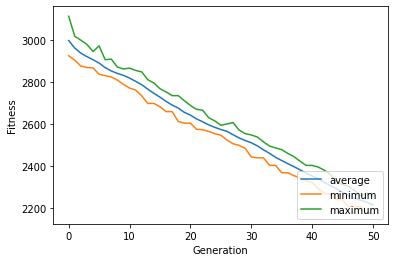

In [130]:
import random
from deap import base, creator, tools, algorithms

def main():
    import numpy
    
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.5, ngen=50, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
    import matplotlib.pyplot as plt
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()